In [52]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

https://www.notion.so/subhasishbiswas/Building-Classification-Models-with-scikit-learn-7c8b61909aa44407bd9a4adab0a192c9

In [19]:
titanic_df=pd.read_csv("Data/titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


https://www.kaggle.com/francksylla/titanic-machine-learning-from-disaster

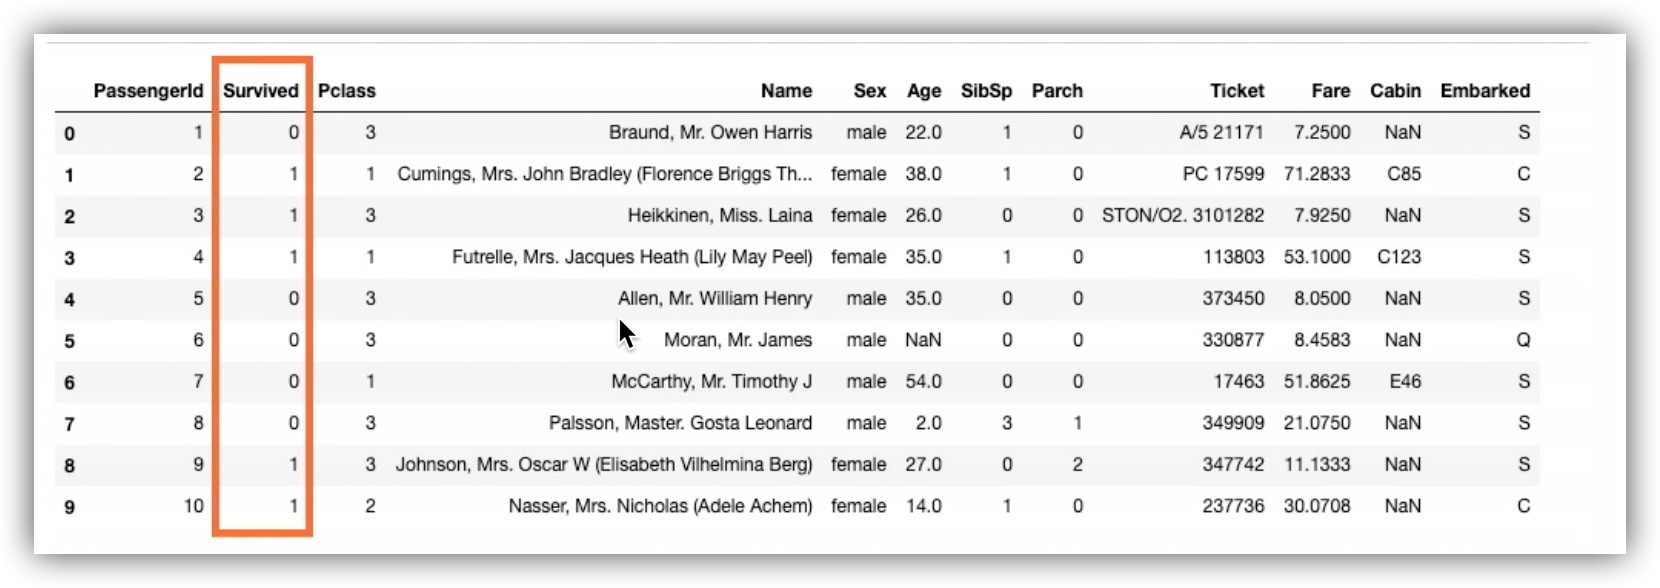

In [9]:
'''
This dataset contains various details about passengers for about 800 of the passengers on the Titanic, 
and it contains a column which tells you whether the passenger survived the Titanic disaster or not. 
Zero means the passenger did not survive.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_21-13-10.jpg')


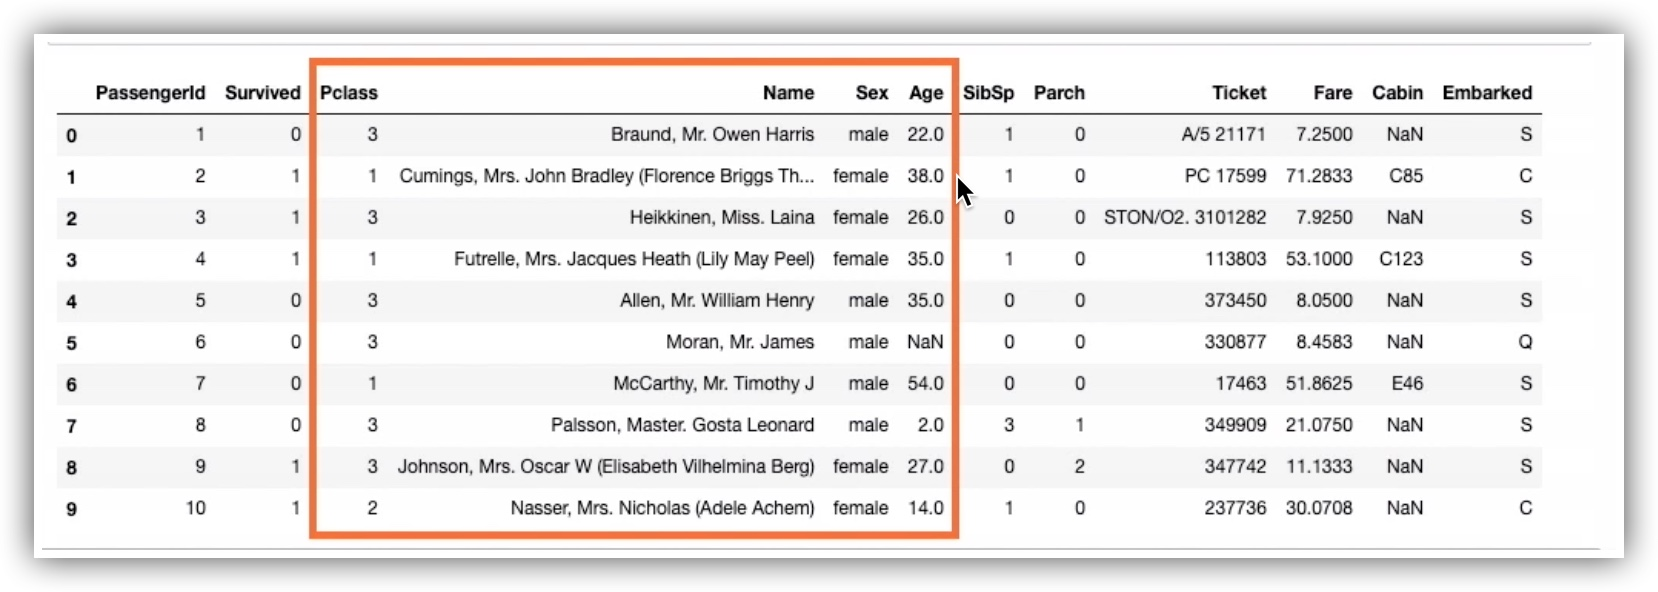

In [10]:
'''
This dataset contains various details about passengers for about 800 of the passengers on the Titanic, 
and it contains a column which tells you whether the passenger survived the Titanic disaster or not. 
Zero means the passenger did not survive.

'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_21-17-38.jpg')

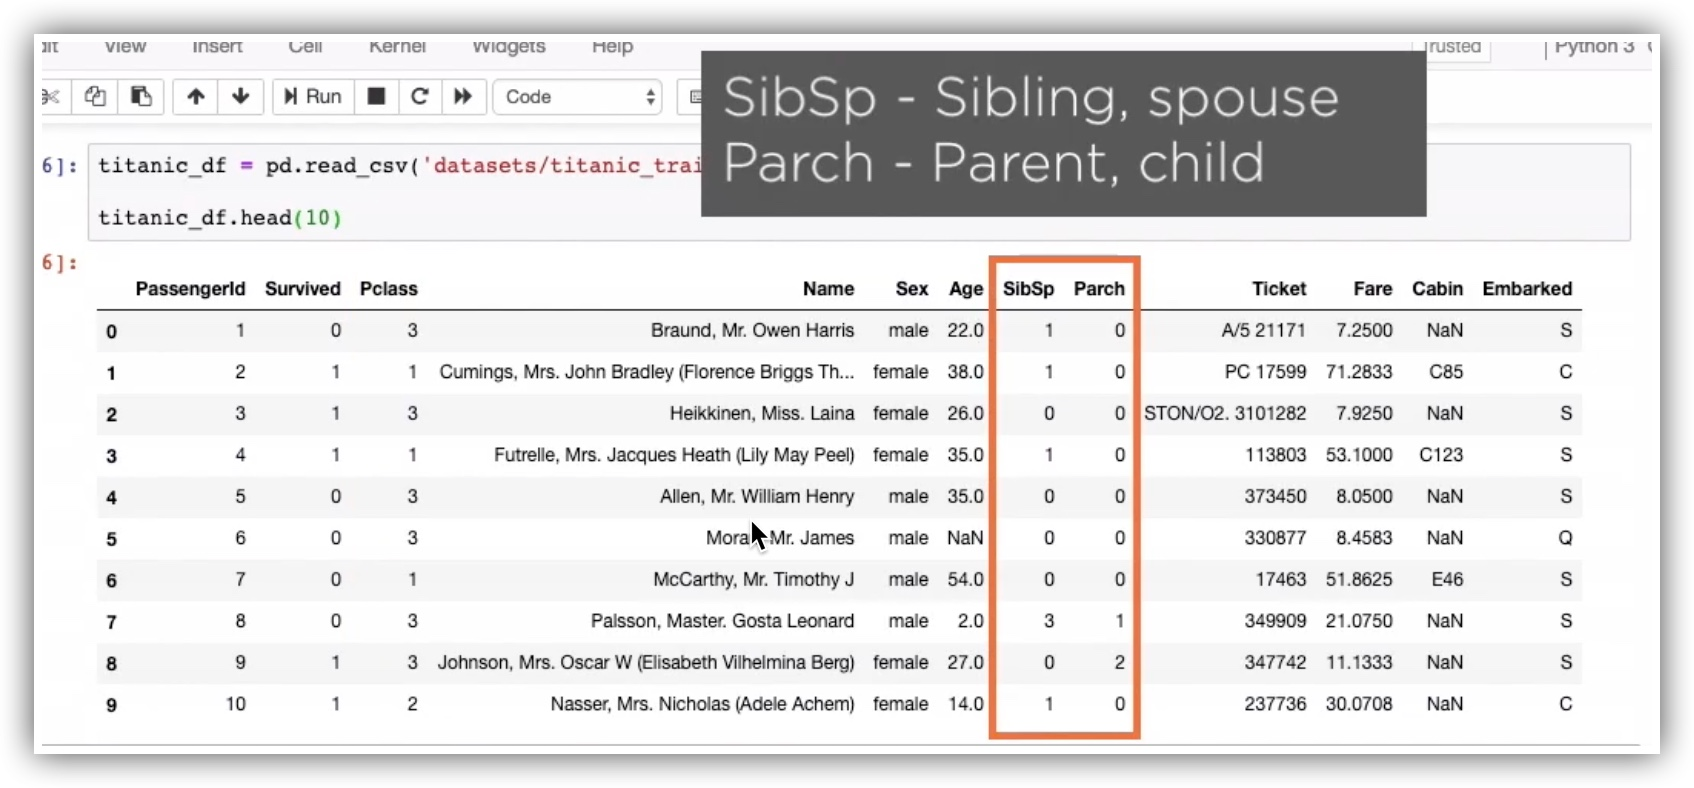

In [12]:
'''
The two columns that have slightly confusing names here stand for siblings, spouse, and parent, child. 
The sibling, spouse column tells you how many siblings a particular passenger traveled with. 
The Parch column indicates whether a passenger's parent or child was present on the Titanic with them. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_21-18-35.jpg')

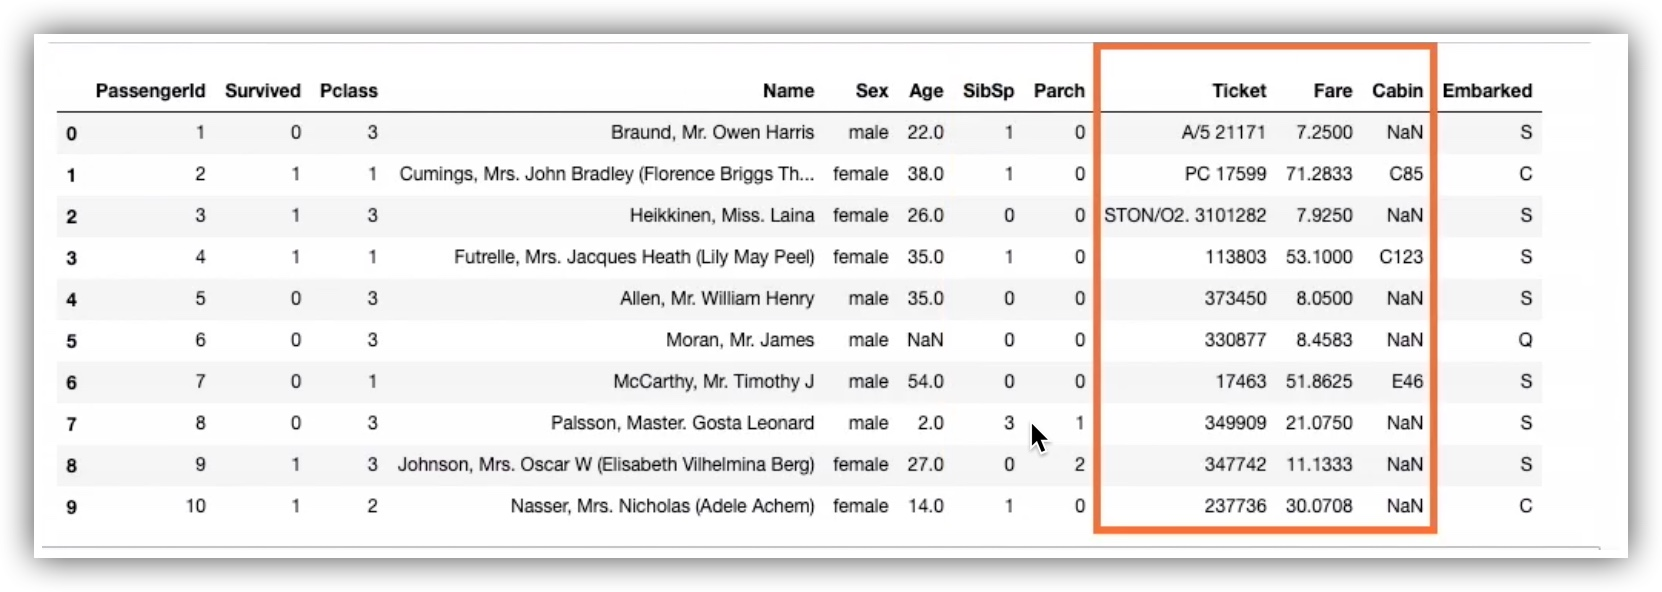

In [13]:
'''
There are other interesting details here as well. The ticket number for a particular passenger, 
the fare that passenger paid, and the cabin number. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_21-21-25.jpg')

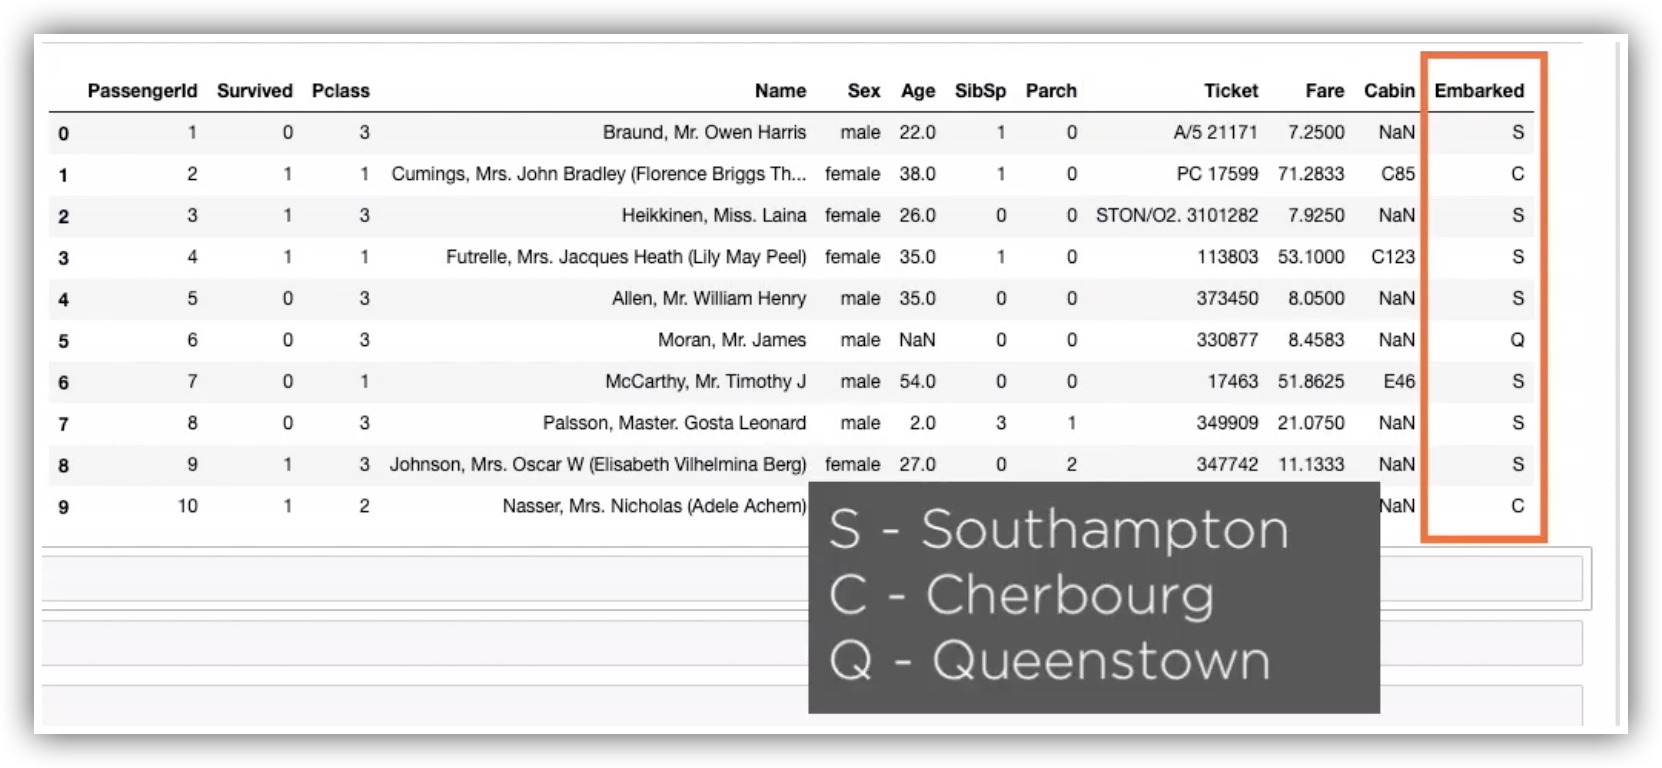

In [14]:
'''
we have the last column here, Embarked. This indicates the port at which the passenger got onto the Titanic. 
This column value is S if the passenger got on at Southampton, C if the passenger got on at Cherbourg, 
and Q for Queenstown. 
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_21-23-14.jpg')

In [16]:
'''
Let's take a look at the shape of the dataset to see how many records and features we are working with. 
There are a total of 891 records, 891 passenger details. And there are 12 columns of information.

One of these is, of course, our labels column, whether the passenger survived or not.
'''
titanic_df.shape

(891, 12)

In [20]:
'''
some of these columns contain irrelevant information, information that may no bearing on whether the passenger 
survived the sinking of the Titanic. 

Examples of these are the passenger ID, the name of the passenger, the number on the passenger's ticket, 
and the cabin number. I'm going to go ahead and drop these columns from our dataset. 

We'll perform the drop in place so that the titanic_df dataframe itself is updated. 
'''
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
'''
Well, we do need information on whether the passenger survived or not. 
That's what we'll use to train our ML model

The class in which the passenger was traveling, whether it was first, second, or third, because you 
might have heard that first class passengers were given preference on lifeboats. 

The sex of the passenger, that's relevant as well, women and children first, after all.

The age of the passenger, maybe younger passengers are more likely to survive.

And in this manner, you can make a case for each of these columns being a viable feature to train our dataset. 
'''

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:

'''
For each column in our dataset, we'll check to see whether any of the column values are equal to null. 
The axis equal to one parameter will perform this check for each column in our dataframe. 

And we'll display a count of how many records have missing or null values. 
As you can see, there are a number of records with missing fields here. 
'''
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [23]:
'''
The classification models that we build won't really know how to deal with these missing values. 
Let's go ahead and clean our data and drop all records with missing field information from our dataset. 

The dropna function on our dataframe will drop all records which have even one field value missing. 
And if you take a look at our resulting dataframes shape, you'll see that we now have fewer records to work with.
We have 712 records in our dataset. 
'''

titanic_df=titanic_df.dropna()
titanic_df.shape

(712, 8)

In [25]:
'''
When you run the missing fields check once again, you'll find that all counts are 0. 
'''
titanic_df[titanic_df.isnull().any(axis=1)].count()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
'''
f you want a quick statistical overview of all of the numeric data in your dataset, 
you can call the describe function on your dataframe. 

This gives us statistical measures, such as mean standard deviation, min, max, and quartiles 
for all numeric values. 

You can see on top here that we have a count of the number of records. There are 712 records in our dataset.

Notice the mean of the survived column. 
Remember the survived column is composed of just 0's and 1's, 0 if the person did not survive the sinking, 1 if he or she did. 
An average value of around 0.4 indicates that only 40% of the passengers in our dataset survived the sinking.

Here is the average age of the passengers. It's around 30, so the passengers were fairly young, 
and the average fare paid, around 35. 
'''
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

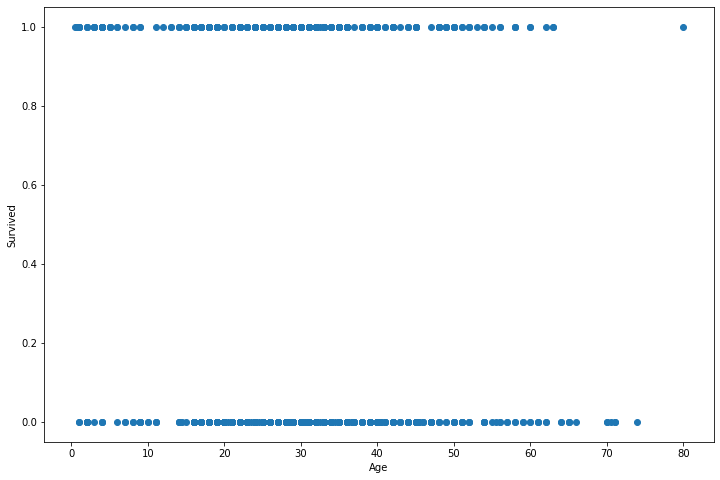

In [27]:
'''
We start off with a simple scatter plot where we plot the age of the passenger on the X axis and along the Y axis
we'll plot whether the passenger survived or not. 

Here are the labels for the X and Y axes, and here is what the resulting visualization looks like. 
Given these distributions, it's really hard to see whether the age of the passenger had any bearing on 
whether the passenger survived. 

'''
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(titanic_df['Age'], titanic_df['Survived'])

plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

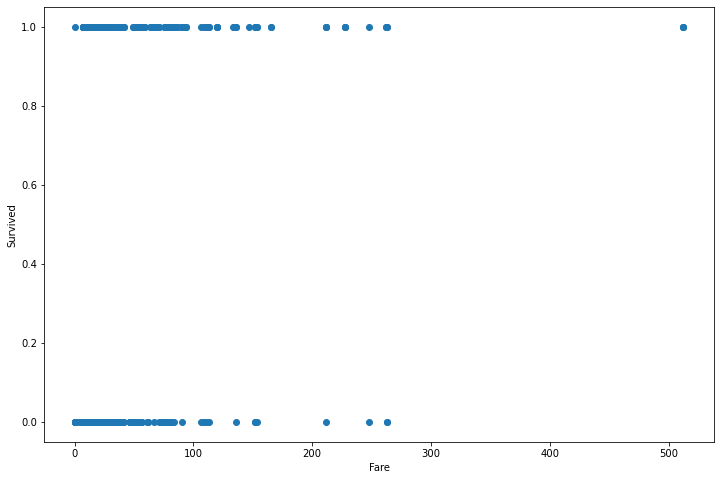

In [28]:
'''
We'll plot a scatter plot to show us the pairwise relationship between the fare paid by a passenger and 
whether the passenger survived or not. 

And here there are some interesting details to view. 
You can see that most of the passengers are clustered at fares below 100, 
but amongst passengers who survived the sinking, you can see that there are a few outliers 
who paid very high fares. 
'''

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(titanic_df['Fare'], titanic_df['Survived'])

plt.xlabel('Fare')
plt.ylabel('Survived')

In [29]:
'''

Let's try and view this data in a slightly different way using something called a crosstab. 

The pd.crosstab function in pandas will set up a matrix for all possible values in the sex column and the 
survived column. 

Here is what the matrix looks like. This particular matrix happens to be a 2 x 2 because the sex can be either 
female or male and survived can be either true or false. 

And here is where a few interesting details jump out. 
Women and children first on lifeboats clearly had an effect. 
Only a minority of women on board lost their lives during the sinking.

Let's take a look at the males here, and you can see clearly here that they were out of luck; 
360 males perished, only 93 survived. 
'''
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [30]:
'''
This time we'll plot the passenger class against whether the passenger survived or not. 
This matrix is a 3 x 2 matrix. There are three passenger classes, first class, second, and third class, 
and of course, whether a passenger survived or not, two columns. 


Based on the facts here, there seems to be some truth to the story that first class passengers 
were given preference on lifeboats. 

You can see here that almost two-thirds of the first class passengers survived the sinking; 64 died, 120 survived.
Passengers traveling by second class seemed to be evenly split, around 50% of them survived the sinking. 
And passengers traveling by third class, well, it's clear from this data that their survival rate was pretty low,
less than 25% of them survived. 
'''


pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [32]:
'''
When you're working with multiple features to train your machine learning model, it's quite possible 
that the features themselves have some kind of interrelationship; they may be correlated. 

Correlation is a number between -1 and 1, which indicates the relationship between 2 variables.

Pandas offers a very helpful core function on your dataframe that allows you to quickly view the correlation 
value between every pair of columns in your data. 

Here is what the resulting correlation matrix for our dataset looks like. 
You can see that it's a matrix of raw numbers. 

Along the matrix are all 1's, indicating that every column is perfectly positively correlated with itself. 
Positive correlation indicates that the variables move in the same direction. 
Negative correlation means that the variables move in different directions.

You can see from this negative value here that the class in which the passenger traveled is 
negatively correlated with survival. 
 
This is because a numeric value of 3 is considered higher than a numeric value of 1. 
So, third class passengers have a lower chance of survival. That's what this number says.

The fare column, on the other hand, is positively correlated with survival. 
This seems to indicate that as the fare paid by a passenger goes up, the survival rate will go up.
'''
titanic_data_corr=titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<AxesSubplot:>

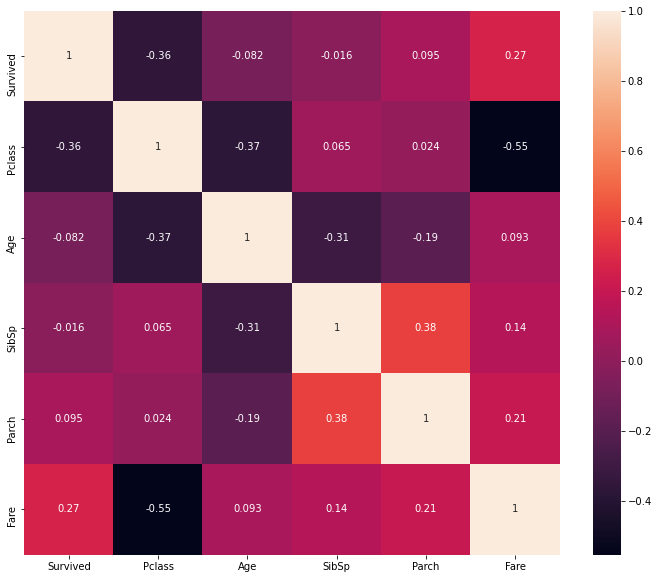

In [33]:
'''
Hard to work with correlation when you're only working with raw numbers. 
If you need a visual way to take a look at correlation data, you should plot a heat map, and you can use the 
sns.heatmap function available in the Seaborn library.

Pass in the correlation matrix that we generated earlier, 
and pass in annot=True in order to view raw correlation numbers in this heat map.

And you can see here that the heat map uses color coding to indicate the correlation between the 
various variables. 

Lighter colors indicate positive correlation, darker colors negative correlation.
'''
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(titanic_data_corr,annot=True)

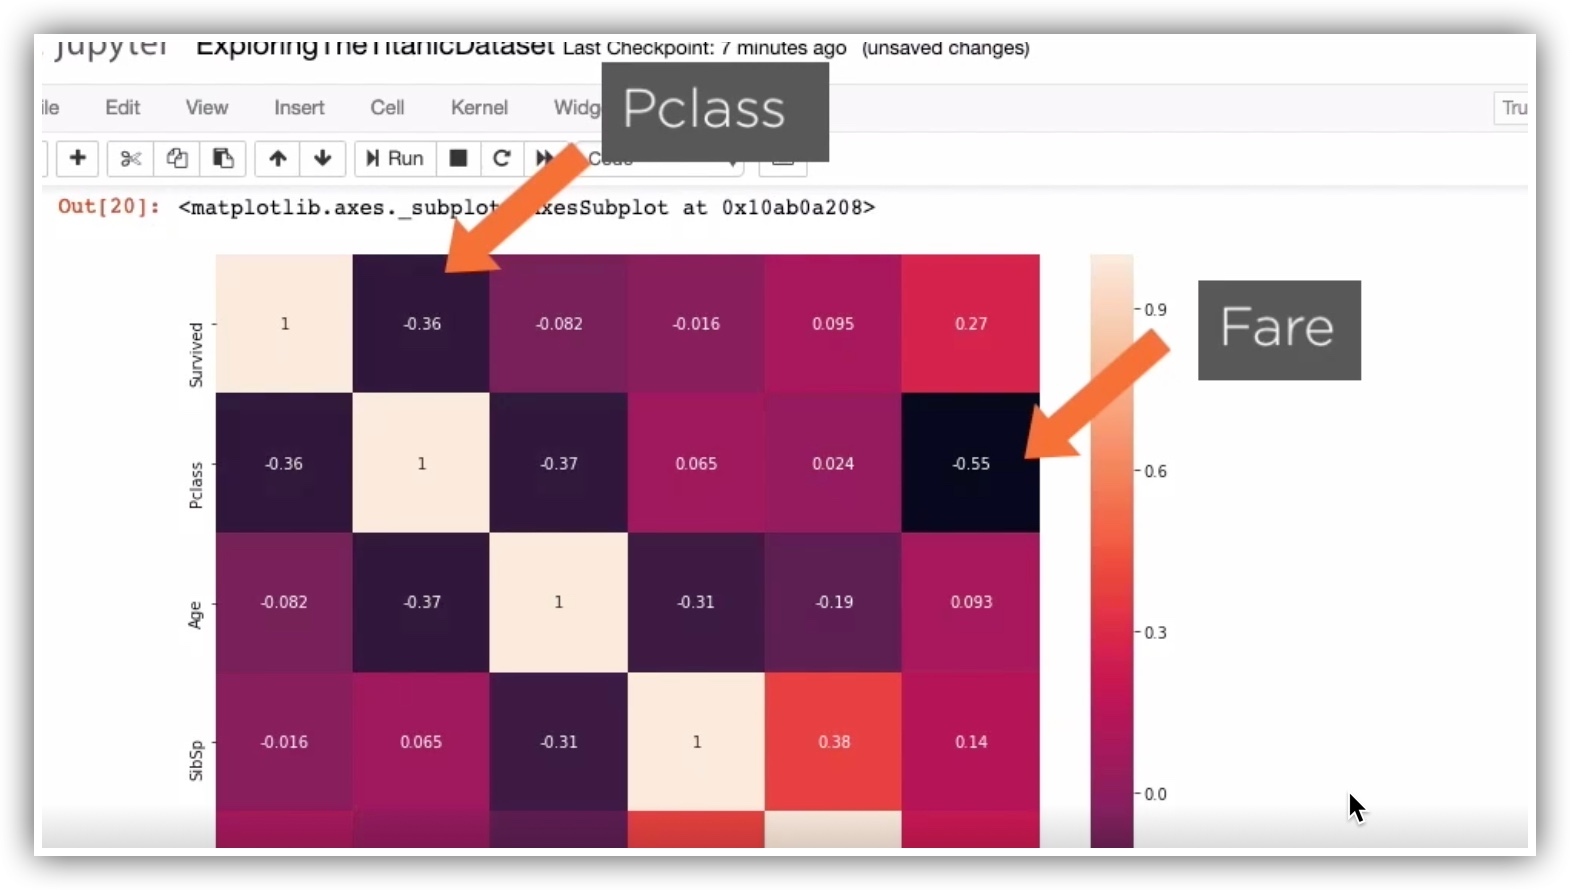

In [34]:
'''
Here are some negatively correlated values. The passenger fare is negatively correlated with the passenger class. Well, we know that. 
Passengers in third class, which is numerically higher, would have paid a lower fare.
'''
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-24_23-01-06.jpg')

In [37]:
'''
Many of the columns in the Titanic dataset have categorical or discrete values. 
Now, machine learning models only accept numeric inputs, which means these categories have to be 
converted to numbers in some way. 

These steps form a part of data preprocessing before we feed our data into our machine learning model, 
and scikit-learn offers this very useful model called preprocessing to help us preprocess our data. 

The first kind of preprocessing we'll perform is to label and code certain categorical values. 
For this, we'll use the preprocessing.LabelEncoder object in scikit-learn. 
The label encoder is what we used to convert categorical values to ordered integer values to 
feed into our ML algorithms.

The label encoder is typically used with ordinal data, where the categories have an inherent order. 
For example, T-shirt category that says small, medium, large will be label encoded because small 
should have a lower numeric value than large.

 Here we use the label encoder for the categorical column which gives us the gender of the passenger, 
 male or female. Now, when we have binary data such as gender, 
 it's okay to use label encoding even without an inherent order. 
'''

label_encoding=preprocessing.LabelEncoder()
titanic_df['Sex']=label_encoding.fit_transform(titanic_df['Sex'].astype(str))

In [38]:
'''
The 0 value represents a female, 1 represents male. 
We've replaced the original categorical encoded values in this column with numeric values. 

'''
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [39]:
'''
The classes_ field in the label_encoding object will give you the original categorical values that were label encoded. 
Here you can see that the genders female and male were label encoded. The order of the classes here correspond 
to the numbers associated with these classes. Female is equal to 0. 
'''
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [40]:
'''
There is another commonly used technique to convert your categorical values to numeric form. 
Categories with no intrinsic order can be converted using something called one-hot encoding. 
If you have your data in pandas dataframe, one-hot encoding is very straightforward. 
Simply call the pd.get_dummies function to convert the categories in a particular column to 
its one-hot encoded form. 

The embarked column that had discrete values C, S, and Q has been converted to its one-hot representation. 
Every discrete category in the embarked column is now a column of its own, Embarked_C, Embarked_Q, and Embarked_S. 

'''
titanic_df=pd.get_dummies(titanic_df,columns=['Embarked'])
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,0,1,0
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
889,1,1,1,26.0,0,0,30.0000,1,0,0


In [41]:
'''
 Now that I have this data set up in the form that I want to use for my ML model, 
 I'm going to shuffle the records in this dataset and save it out as a CSV file. 
 
 I performed the shuffle by invoking the sample function in my dataframe. 
 Frac=1 returns all of the original records, so I don't want to subset, 
 I want the entire dataset. 
 
 Reset_index will reset the indices of the records and we'll drop the original indices, 
 that's what drop=True says. 
 
 When you're building machine learning models, 
 it's important that your training data be fed in in a shuffled form. 
 
 Shuffling your training data ensures that your ML model doesn't inadvertently pick up patterns 
 in the ordering of your dataset. 
'''

titanic_df=titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,1,31.0,1,1,26.250,0,0,1
1,1,1,0,23.0,1,0,113.275,1,0,0
2,0,3,1,19.0,0,0,6.750,0,1,0
3,1,3,1,3.0,1,1,15.900,0,0,1
4,0,1,1,64.0,1,4,263.000,0,0,1


In [43]:
'''
With all of our data exploration and preprocessing complete, I'm going to write this out to a CSV file 
called titanic_processed.csv. 
I'm not going to include indices from this dataframe; that's why index is False. 
'''
titanic_df.to_csv("Data/titanic_processed.csv",index=False)

In [44]:
!ls data

titanic_processed.csv titanic_train.csv


In [45]:
titanic_df=pd.read_csv("Data/titanic_processed.csv")
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,1,31.0,1,1,26.250,0,0,1
1,1,1,0,23.0,1,0,113.275,1,0,0
2,0,3,1,19.0,0,0,6.750,0,1,0
3,1,3,1,3.0,1,1,15.900,0,0,1
4,0,1,1,64.0,1,4,263.000,0,0,1


In [47]:
'''
We have 712 records in total. There are 10 columns here. 
The number of columns have increased thanks to one-hot encoding of the Embarked column.
'''
titanic_df.shape

(712, 10)

In [49]:
'''
Training our machine learning model will be performed using training data. 
Now, it's standard practice to hold out a little bit of our dataset to evaluate our model, 
and this can be easily done in scikit-learn using the train_test_split function. 

Train_test_split will allow us to hold out a fraction of the original dataset in order to test or 
measure how our model performs on instances it hasn't encountered before during training. 

The features that we'll use to train our machine learning model are all features in our dataframe, 
except the Survived column. 
So we dropped the Survived column from the original dataframe and saved the rest of the features in the X variable. 

The target values, or the labels that our ML is going to try and predict are whether the passengers survived 
or not. This is present in the Survived column. This is what we assigned to the Y variable. 

With our model's features and labels all set up, we are now ready to call train_test_split. 
By default, the train_test_split function in scikit-learn automatically shuffles the underlying data, 
so there was no reason for us to shuffle up front, but it's always a good practice, which is why I did it. 

The test_size of 0.2 says that we are holding out 20% of our data for the purposes of testing. 
We'll only use 50% to train our model.

Train_test_split will return features and labels for the training dataset, as well as the test dataset.
'''
X=titanic_df.drop("Survived",axis=1)
Y=titanic_df["Survived"]

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [50]:
'''
 Let's take a look at the shape of the training data and labels to see how many records we have to work with. 
 We'll use 569 rows from our original dataset to train our model. 
'''
x_train.shape,y_train.shape

((569, 9), (569,))

In [51]:
'''
The remaining records from our original dataset, which make up the test data, are instances 
that our model has not encountered before during training. 
We have 143 test instances to measure and evaluate our model. 
'''
x_test.shape,y_test.shape

((143, 9), (143,))

In [56]:
'''
 A logistic regression model in scikit-learn can be built and trained using the logistic regression estimator, 
 which you can import from the sklearn.linear_model namespace. 
 
 An estimator in scikit-learn is a high-level object that makes it very easy for you to build and train 
 your ML models and use them for prediction. 
 
 We instantiate the LogisticRegression estimator and call fit on our training data, 
 along with our training labels to train our model. 
 
 Here is the instance of the LogisticRegression estimator that we instantiate.
 We've passed in a number of different parameters to design our model in a certain way
 
 Penalty equal to l2 is the default value used under the hood by the LogisticRegression estimator. 
 This implies that we are regularizing our LogisticRegression model by applying a penalty on models 
 that are overly complex.
 Regularization is a method used in machine learning to penalize complex models so that the resulting model 
 is more robust and better for prediction.
 
 There are different kinds of penalties that you could choose to apply, L1 and L2 are the options here. 
 The L2 penalty uses the L2 norm of the coefficients of your model as the penalty function. The L2 norm is 
 simply the sum of the squares of the coefficients.
 
 When you use a regularized model, you can use C to specify the strength of your regularization. 
 C stands for inverse of regularization strength. Smaller values indicate stronger regularization.
 
 Behind the scenes, the LogisticRegression estimator uses an optimization problem to fit your model.
 
 The algorithm liblinear indicates the kind of optimization that logistic regression performs. 
 Liblinear works very well for smaller datasets like ours. 
 
 The fit function invoked on the training data and labels are what start the training process for your model. 
 
'''

logistic_model=LogisticRegression(penalty='l2',C=1.0,solver='liblinear').fit(x_train,y_train)

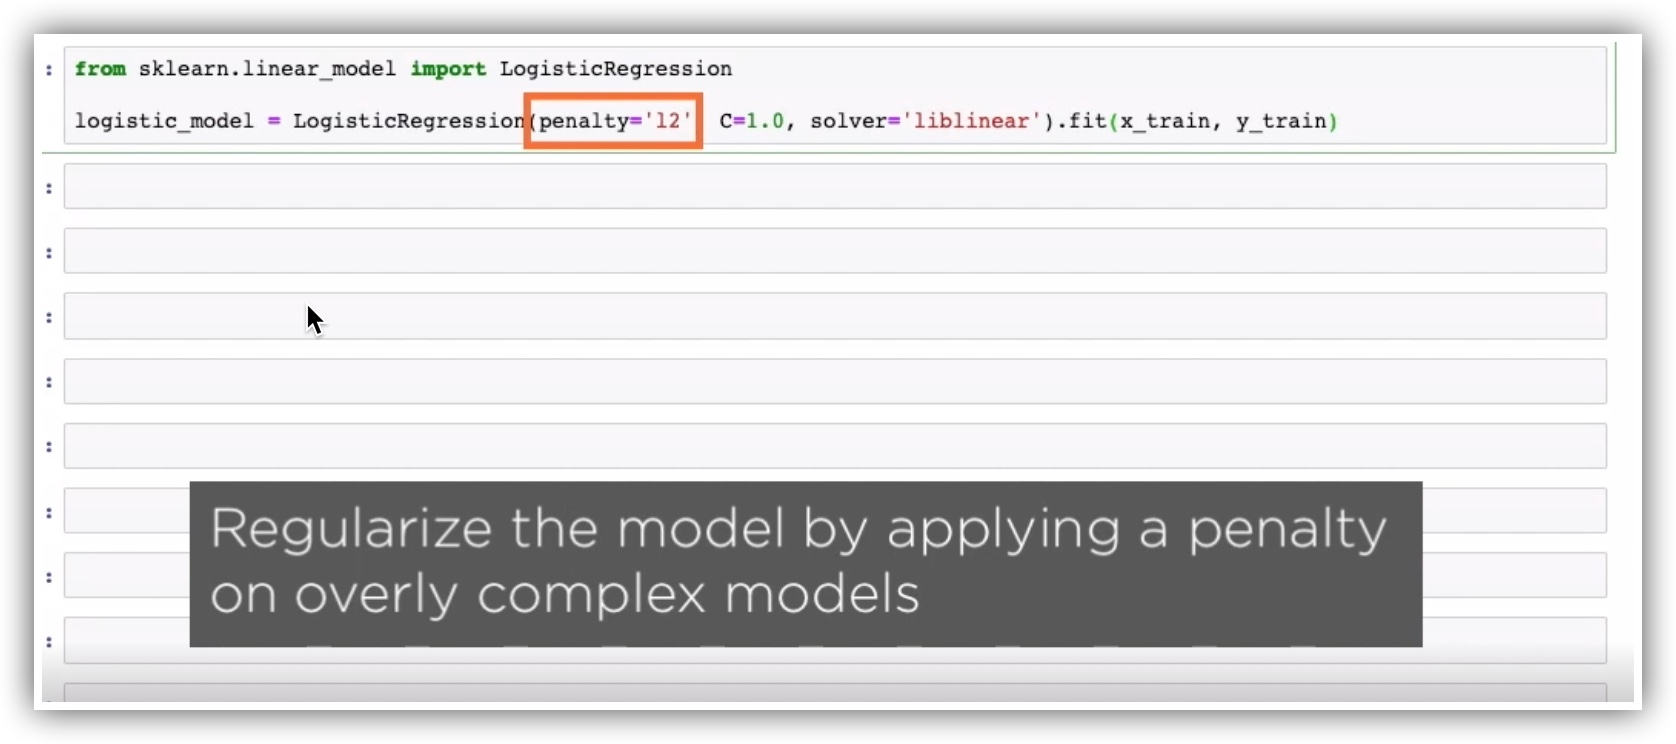

In [57]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-25_13-30-09.jpg')

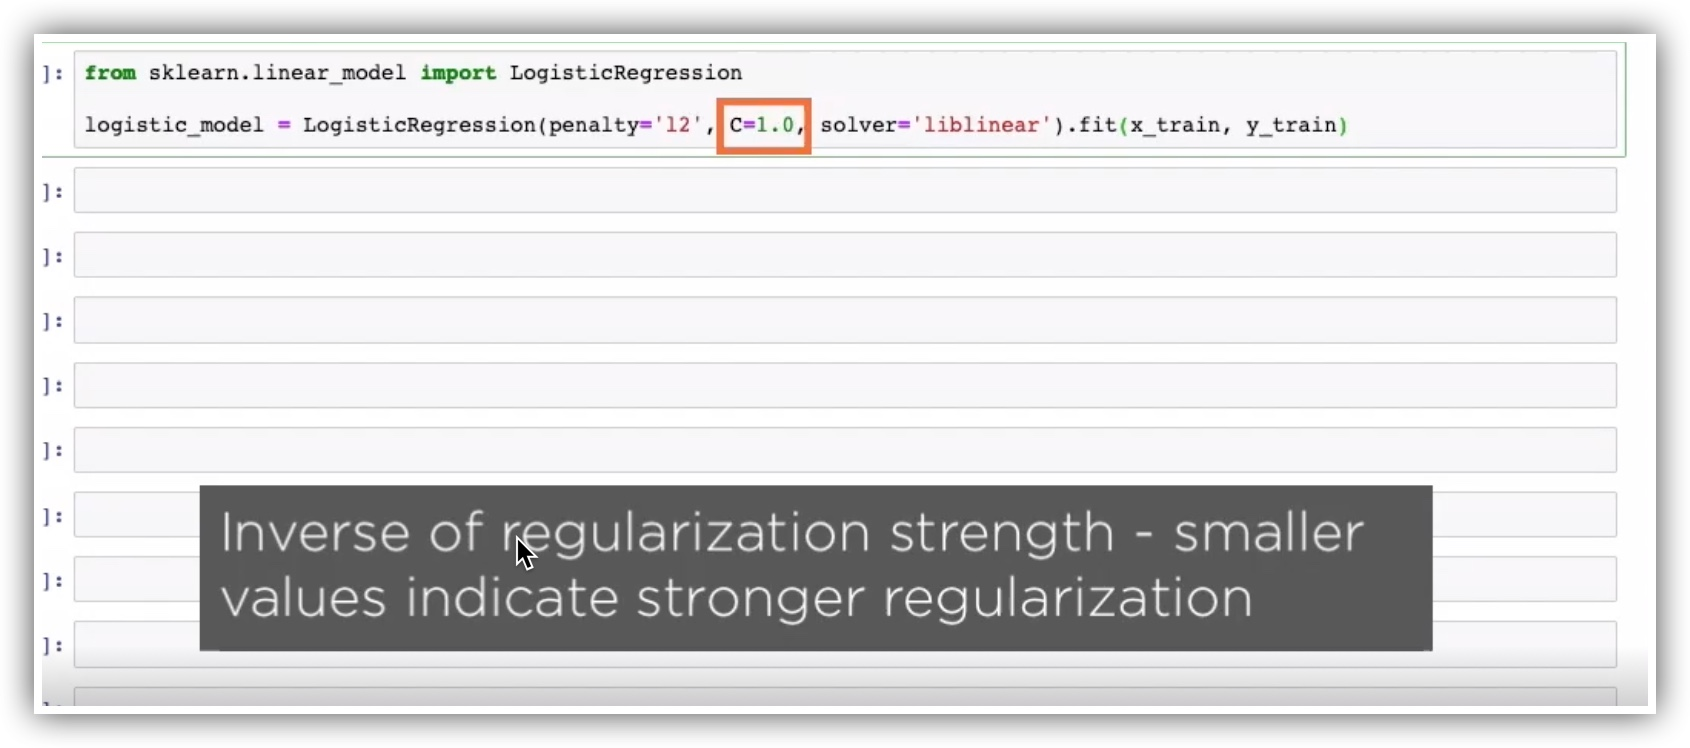

In [58]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-25_13-30-46.jpg')

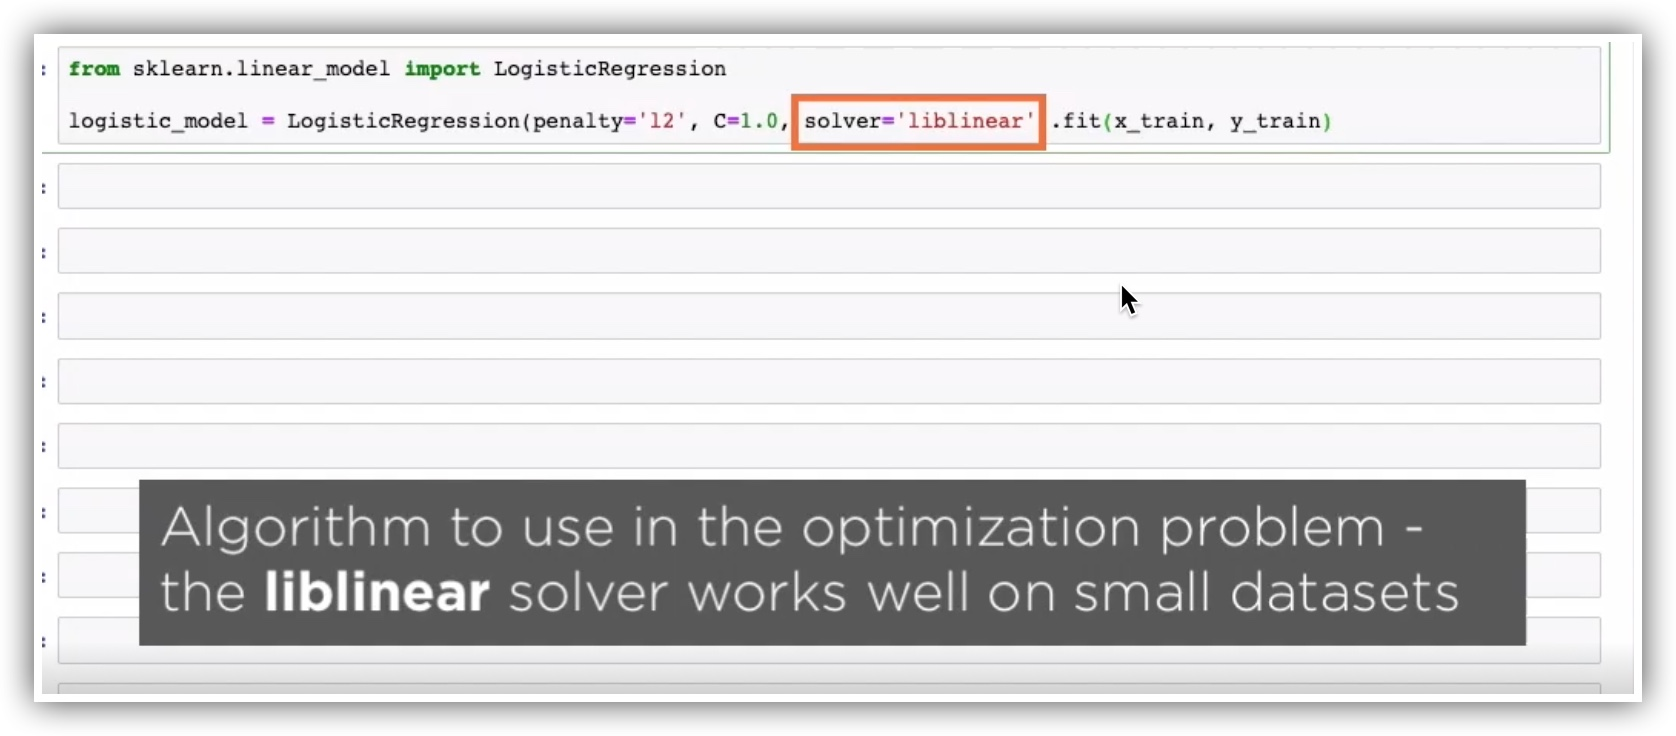

In [59]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-25_13-31-16.jpg')

In [60]:
'''
 Once your model has completed training, you can use it for predictions on your test data.
 
 Call predict on your fully trained logistic model and pass in the features of your test data, 
 and you get your predictions in y_pred.
'''
y_pred=logistic_model.predict(x_test)

In [63]:
'''
how the predictions of this model turn out. Let's set up the actual values, 
the actual labels from our test data, and the predicted values from our model in a dataframe 
so that we can view them side-by-side. 

We'll now take a look at a small sample of actual versus predicted results, and you can see that 
almost all of them match.
'''
pred_results=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
pred_results.head()

,y_test,y_pred
376,0,0
478,1,1
453,1,1
319,0,0
18,1,0


In [64]:
'''
But what we really need is an objective way to measure the performance of our logistic regression model. 

Let's first set up a confusion matrix using the pandas crosstab function. This confusion matrix will plot the actual results versus the predicted 
values from our model. 

Observe that the columns are actual values from our dataset, 0 for when the passenger did not survive, 
1 for when the passenger did, and the rows are predicted values from our model.

You can see that most of the results are in the true positive and true negative cells, 
indicating that the accuracy of this model is pretty high. 

There are, of course, a few false positives and false negatives. Our model thought the passenger did not survive while he or she did, 
or vice versa.
'''
titanic_crosstab=pd.crosstab(pred_results.y_pred,pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,76,16
1,16,35


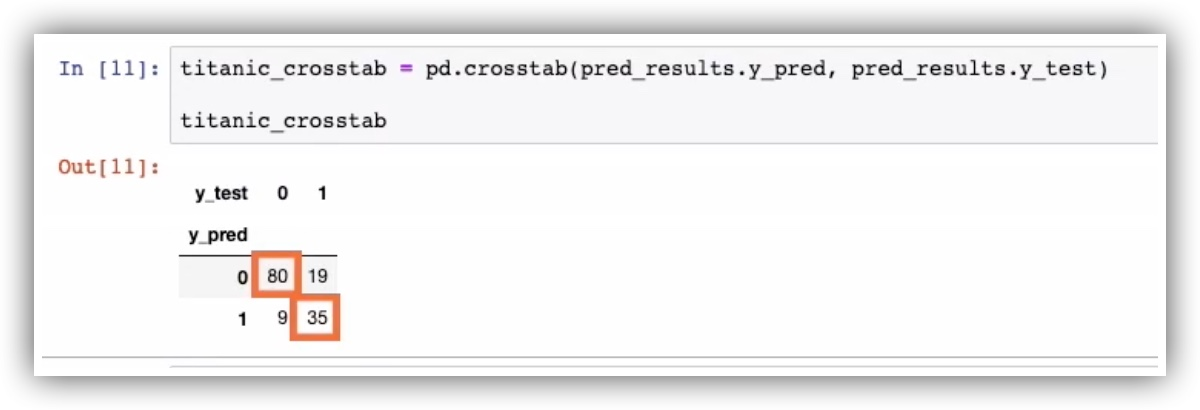

In [65]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-25_16-50-17.jpg')

In [67]:
'''
But we really only get a good understanding of how our model performs when we measure it using the right metrics, 
and for this, scikit-learn offers a metrics namespace with commonly used coding metrics for different ML models, 
from sklearn.metrics, import accurcy_score, precision_score, and recall_score.
'''
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [68]:
'''
Each of these are functions that you can invoke by passing in the actual test Y labels from your dataset 
and the predicted values from your model. 

Use these functions to calculate the accuracy, precision, and recall of our logistic regression model and 
let's print these scores out to screen. 

And here are our accuracy, precision, and recall values. 
All of them seem fairly high, indicating that this is a fairly good model. 

Remember that for binary classifiers where you classify data into two categories, your classifier should have an 
accuracy of over 50% because 50% accuracy is what you get when you guess at random. 

The accuracy of our model is 77.6 %. This represents how many of the predicted values did our model get right. 

Here is the precision score of our model, 68.5 %, again, pretty decent. 
The precision score is a number that measures how many of the passengers that our model thought survived the 
sinking actually did survive. 

At 68%, there were very few false positives in our predictions. 


The recall score for this particular model is much lower than the other scores, and this is a measure of 
how many of the actual survivors of the Titanic did our model correctly predict. 

This lowish recall_score indicates that there were many false negatives in our predictions 
where our model thought that the passenger did not survive, 
'''
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.7762237762237763
precision_score :  0.6862745098039216
recall_score :  0.6862745098039216


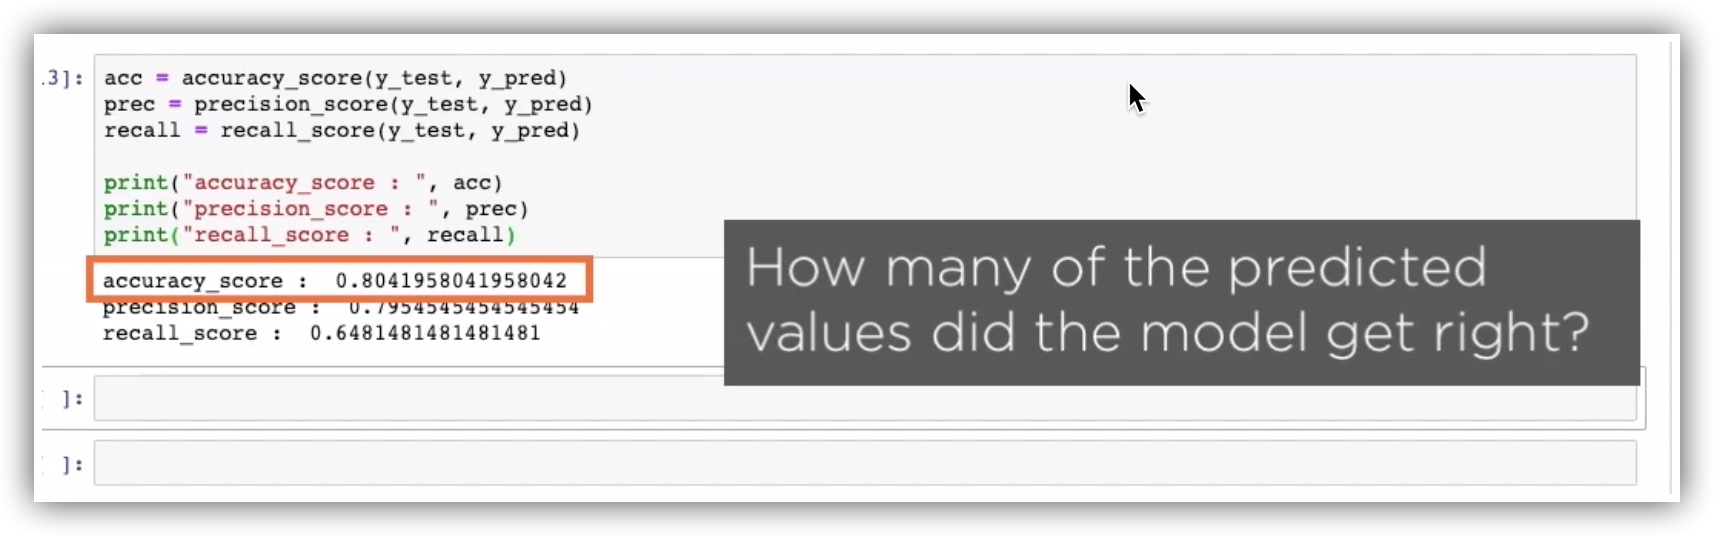

In [69]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-25_16-58-10.jpg')

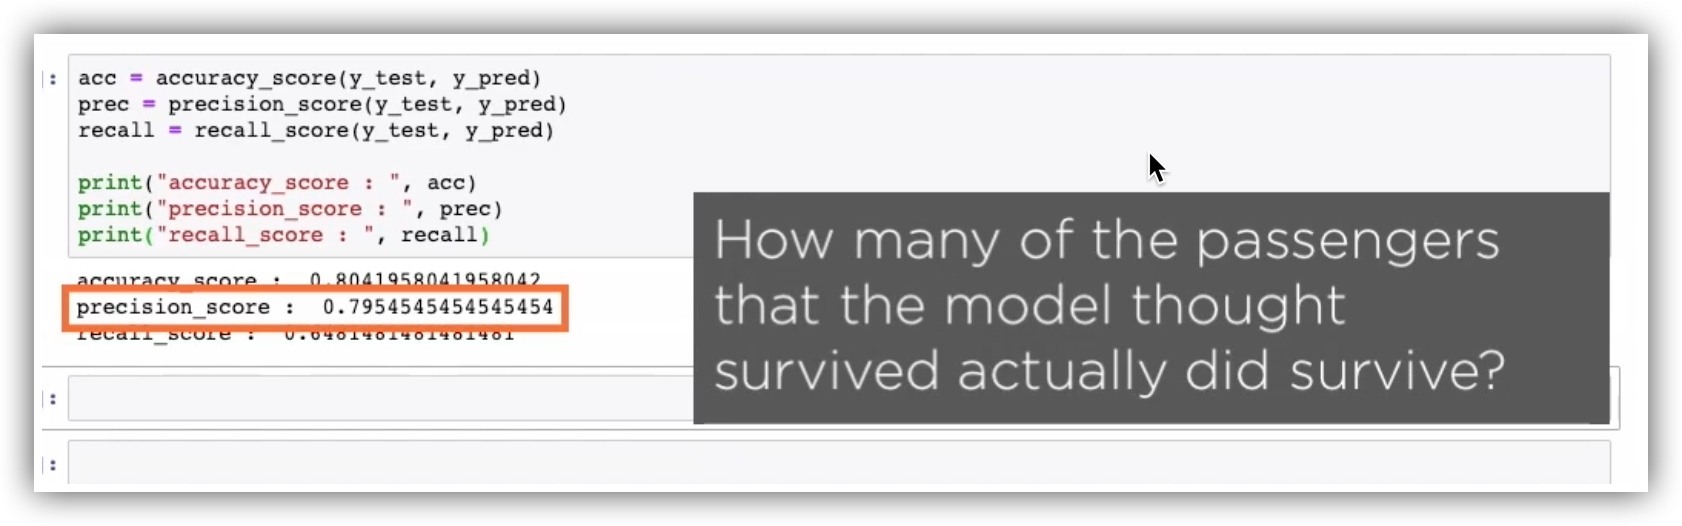

In [70]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-25_16-58-47.jpg')

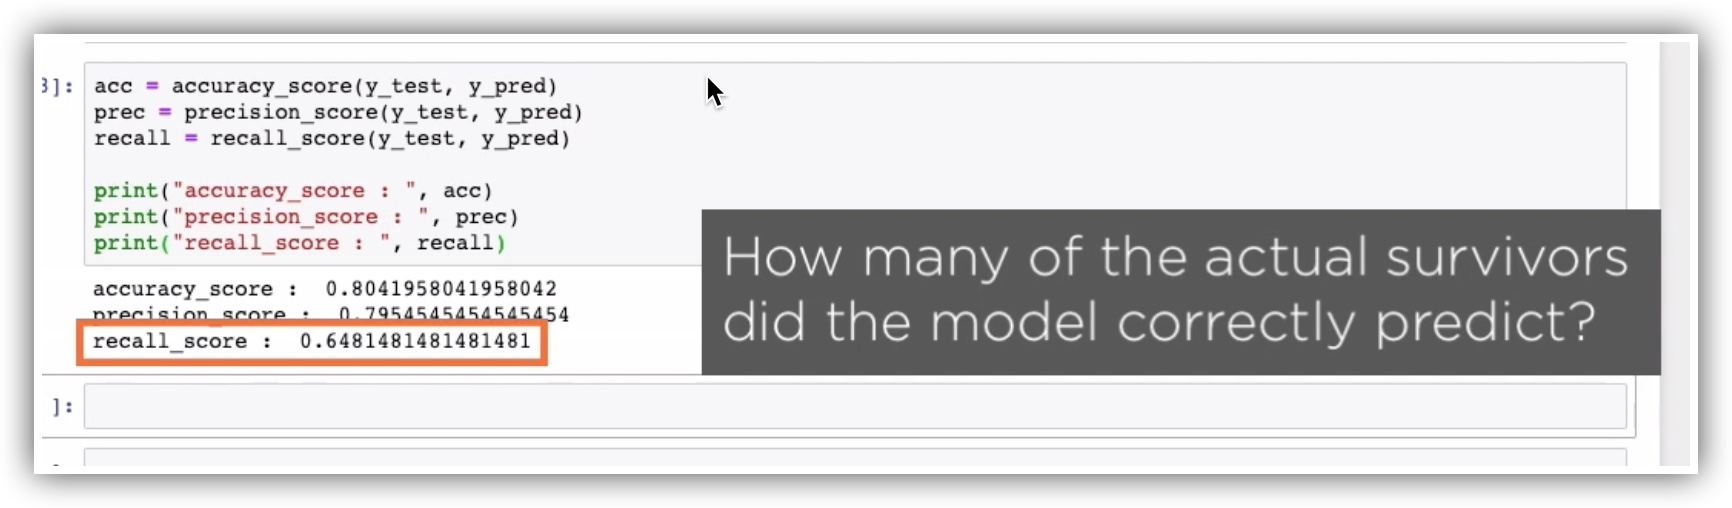

In [71]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/Classification/Janani Ravi/Building Classification Models with scikit-learn/Image/2021-12-25_17-00-13.jpg')

In [72]:
'''
As you are aware, the accuracy, precision, and recall scores can be easily calculated using the confusion matrix. 
Here is the confusion matrix for our data once again. 

I'll now set up variables holding the data for each of our cells in our confusion matrix. 

The TP variable at cell 1, 1 represents the true positive predictions from our machine learning model. 
Our model predicted that the passenger survived and they actually did survive. 

The TN variable represents the true negatives from our model predictions. 

FP holds the false positives. Our model thought the passenger survived, but the passenger actually did not. 

And finally, FN represents the false negatives. Our model thought that the passenger did not survive while 
the passenger actually did. 

You can see that this number is a little high, which is why we have a lower recall score. 

'''

TP=titanic_crosstab[1][1]
TN=titanic_crosstab[0][0]
FP=titanic_crosstab[0][1]
FN=titanic_crosstab[1][0]

In [73]:
'''
Let's use this confusion matrix to manually calculate each of the scores that we measured earlier using 
scikit-learn libraries. 

Here is our accuracy score, TP + TN divided by the total number of instances on our test data. 
And here you see that the accuracy that we get using manual calculation is exactly the same as the 
accuracy score from the scikit-learn library.
'''
accuracy_score_verified=(TP+TN)/(TP+TN+FP+FN)
accuracy_score_verified

0.7762237762237763

In [74]:
precision_score_survived = TP / (TP + FP)

precision_score_survived

0.6862745098039216

In [75]:
recall_score_survived = TP / (TP + FN)

recall_score_survived

0.6862745098039216